In [7]:
import numpy as np
import pandas as pd
import matplotlib
import warnings
# ML packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = ['Heiti TC']
warnings.filterwarnings("ignore")

In [94]:
# '''数据处理 整合多个数据源的数据，存在一个文件里 *——————————————————————————————————————————————————————————————'''
# # 把因子值改成rank，并标准化：
# def rank_std_df(data: pd.DataFrame):
#     scaler = StandardScaler()
#     a = np.array(data)
#     a_scaled = scaler.fit_transform(a.T)
#     data.loc[:, :] = a_scaled.T

#     return data


# close = pd.read_csv('data/申万31大行业_close.csv', index_col=0, parse_dates=True)
# returns = close.pct_change(periods=22)  # 月收益率
# returns = returns.shift(-22)  # 接下来一个月的收益率
# returns = returns[returns.index >= pd.to_datetime('2016-06-30')]


# sample1 = pd.read_csv('data/barra/factor_values/barra_交通运输(申万).csv', index_col=0, parse_dates=True)
# barra_factors = list(sample1.columns)

# other_factors_normal = ['index_growth', 'tech_concentric', 'big_break', 'herd_behavior']
# other_factors_ranked = ['profit_growth']
# all_other_factors = other_factors_normal.copy()
# all_other_factors.extend(other_factors_ranked)

# factors_list = barra_factors.copy().extend(all_other_factors)

# dataframes = []

# returns.columns = returns.columns.str.replace(r'\(.*', '', regex=True).str.strip()
# returns.drop(columns=['银行', '非银金融'], inplace=True)
# melted_df = returns.melt(ignore_index=False, var_name='ind_name', value_name='return_m')
# melted_df.reset_index(inplace=True)
# melted_df.columns = ['Date', 'ind_name', 'return_m']
# dataframes.append(melted_df)

# for fac in other_factors_normal:
#     df = pd.read_csv('data/其他因子数据/处理后/' + fac + '.csv', index_col=0, parse_dates=True)
#     df.columns = df.columns.str.replace(r'\(.*', '', regex=True).str.strip()
#     melted_df = df.melt(ignore_index=False, var_name='ind_name', value_name=fac)
#     melted_df.reset_index(inplace=True)
#     melted_df.columns = ['Date', 'ind_name', fac]
#     dataframes.append(melted_df)

# for fac in other_factors_ranked:
#     df = pd.read_csv('data/其他因子数据/处理后/' + fac + '.csv', index_col=0, parse_dates=True)
#     df.columns = df.columns.str.replace(r'\(.*', '', regex=True).str.strip()
#     df = rank_std_df(df)
#     melted_df = df.melt(ignore_index=False, var_name='ind_name', value_name=fac)
#     melted_df.reset_index(inplace=True)
#     melted_df.columns = ['Date', 'ind_name', fac]
#     dataframes.append(melted_df)

# print(barra_factors)
# for fac in barra_factors:
#     if fac == 'leverage':
#         df = pd.read_csv('data/杠杆因子/申万一级月频杠杆因子.csv', index_col=0, parse_dates=True)
#         df.drop(columns=['银行(申万)', '非银金融(申万)'], inplace=True)
#     else:
#         df = pd.read_csv('data/barra/standardized_factors/barra_' + fac + '.csv', index_col=0, parse_dates=True)
#     df.columns = df.columns.str.replace(r'\(.*', '', regex=True).str.strip()
#     melted_df = df.melt(ignore_index=False, var_name='ind_name', value_name=fac)
#     melted_df.reset_index(inplace=True)
#     melted_df.columns = ['Date', 'ind_name', fac]
#     dataframes.append(melted_df)

# merged_df = dataframes[0]
# for df in dataframes[1:]:
#     merged_df = pd.merge(merged_df, df, on=['Date', 'ind_name'], how='left')

# # merged_df.drop(columns='Date', inplace=True)
# # merged_df.reset_index(drop=True, inplace=True)

# # Display the final merged DataFrame
# print(merged_df)
# print(merged_df['Date'].iloc[0], merged_df['Date'].iloc[-1])
# merged_df = merged_df.ffill().dropna()
# merged_df = merged_df[merged_df['Date'] <= pd.to_datetime('2024-03-31')]
# print(merged_df)
# print(merged_df['Date'].iloc[0], merged_df['Date'].iloc[-1])

# print(merged_df['ind_name'].unique())

# merged_df.to_csv('data/ML/ML_merged_df.csv')
# '''数据处理结束 *——————————————————————————————————————————————————————————————'''


['beta', 'mom', 'size', 'earning', 'dastd', 'cmra', 'growth', 'bookToPrice', 'leverage', 'liquidity', 'nonLinearSize']
            Date ind_name  return_m  index_growth  tech_concentric  big_break  \
0     2016-06-30     农林牧渔  0.000930     -0.395103        -0.534935   0.216488   
1     2016-07-01     农林牧渔  0.007914     -0.394935        -0.615758   0.167321   
2     2016-07-04     农林牧渔 -0.010847     -0.394976         0.781038   0.194718   
3     2016-07-05     农林牧渔 -0.012547     -0.394947         1.184031  -0.567996   
4     2016-07-06     农林牧渔 -0.031149     -0.395125         0.526932  -0.467792   
...          ...      ...       ...           ...              ...        ...   
56081 2024-06-11     美容护理       NaN           NaN              NaN        NaN   
56082 2024-06-12     美容护理       NaN           NaN              NaN        NaN   
56083 2024-06-13     美容护理       NaN           NaN              NaN        NaN   
56084 2024-06-14     美容护理       NaN           NaN              NaN     

'数据处理结束 *——————————————————————————————————————————————————————————————'

In [8]:
''' ML split and save datas *——————————————————————————————————————————————————————————————'''
original_data = pd.read_csv('data/ML/ML_merged_df.csv', index_col=0, parse_dates=True, date_format='%Y-%m-%d')
original_data['Date'] = pd.to_datetime(original_data['Date'])
data = pd.get_dummies(original_data, columns=['ind_name'], drop_first=False)

data_temp = data[data['Date'] < pd.to_datetime('2022-01-01')]
X = data_temp.drop(columns=['return_m'])
y = data_temp['return_m']

data_test = data[data['Date'] >= pd.to_datetime('2022-01-01')]
X_test = data_test.drop(columns=['return_m'])
y_test = data_test['return_m']

X = X.drop(columns=['Date'])
y = y.drop(columns=['Date'])
X_test = X_test.drop(columns=['Date'])
y_test = y_test.drop(columns=['Date'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

Epoch 1/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0192 - mae: 0.0937 - val_loss: 0.0053 - val_mae: 0.0561
Epoch 2/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - loss: 0.0049 - mae: 0.0539 - val_loss: 0.0047 - val_mae: 0.0531
Epoch 3/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - loss: 0.0043 - mae: 0.0504 - val_loss: 0.0043 - val_mae: 0.0508
Epoch 4/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 0.0038 - mae: 0.0474 - val_loss: 0.0039 - val_mae: 0.0477
Epoch 5/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - loss: 0.0037 - mae: 0.0464 - val_loss: 0.0038 - val_mae: 0.0478
Epoch 6/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - loss: 0.0035 - mae: 0.0450 - val_loss: 0.0035 - val_mae: 0.0452
Epoch 7/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - loss: 0.0033 - mae: 0.0438 - val_loss: 0.0033 - val_mae: 0.0439
Epoch 8/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - loss: 0.0031 - mae: 0.0426 - val_loss: 0.0033 - val_mae: 0.0444
Epoch 9/100
852/852 ━━━━━━━━━━━━━━

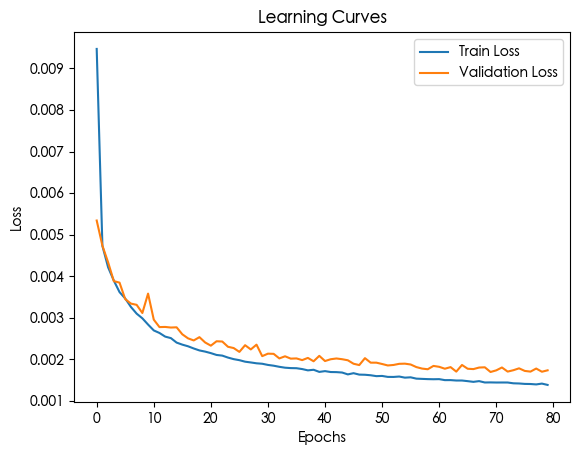

492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.0145 - mae: 0.0863
Test MAE: 0.0986
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step
Test MSE: 0.0187
Test RMSE: 0.1368
Test R-squared: -2.9194


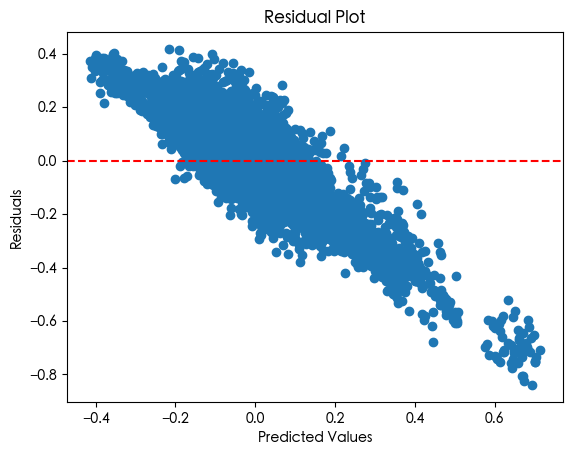

In [99]:
# # NN
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping

# model = Sequential([
#     Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(1, activation='linear')  # Linear activation for regression
# ])
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_valid, y_valid),
#     epochs=100,
#     batch_size=32,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # leaning curves
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Learning Curves')
# plt.legend()
# plt.show()

# # Evaluate the model on the test set
# test_loss, test_mae = model.evaluate(X_test, y_test)
# print(f"Test MAE: {test_mae:.4f}")

# from sklearn.metrics import mean_squared_error
# y_pred = model.predict(X_test)
# test_mse = mean_squared_error(y_test, y_pred)
# print(f"Test MSE: {test_mse:.4f}")
# import numpy as np
# test_rmse = np.sqrt(test_mse)
# print(f"Test RMSE: {test_rmse:.4f}")
# from sklearn.metrics import r2_score
# test_r2 = r2_score(y_test, y_pred)
# print(f"Test R-squared: {test_r2:.4f}")
# import matplotlib.pyplot as plt

# y_pred = y_pred.ravel()
# residuals = y_test - y_pred
# plt.scatter(y_pred, residuals)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel('Predicted Values')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()


In [103]:
# # random forest
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Initialize the Random Forest Regressor
# model = RandomForestRegressor(n_estimators=29, random_state=42)

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Predict on the validation data
# y_pred_valid = model.predict(X_valid)

# # Evaluate the model performance on the validation set
# mse_valid = mean_squared_error(y_valid, y_pred_valid)
# mae_valid = mean_absolute_error(y_valid, y_pred_valid)
# r2_valid = r2_score(y_valid, y_pred_valid)

# print("Validation Mean Squared Error:", mse_valid)
# print("Validation Mean Absolute Error:", mae_valid)
# print("Validation R-squared:", r2_valid)

# # Predict on the test data
# y_pred_test = model.predict(X_test)

# # Evaluate the model performance on the test set
# mse_test = mean_squared_error(y_test, y_pred_test)
# mae_test = mean_absolute_error(y_test, y_pred_test)
# r2_test = r2_score(y_test, y_pred_test)

# print("Test Mean Squared Error:", mse_test)
# print("Test Mean Absolute Error:", mae_test)
# print("Test R-squared:", r2_test)

Validation Mean Squared Error: 0.0006415072170640967
Validation Mean Absolute Error: 0.018446094879617153
Validation R-squared: 0.881870952399114
Test Mean Squared Error: 0.00551087603390013
Test Mean Absolute Error: 0.05851845778295396
Test R-squared: -0.15388467153956453


In [90]:
# # XGBoost
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dvalid = xgb.DMatrix(X_valid, label=y_valid)
# dtest = xgb.DMatrix(X_test, label=y_test)

# params = {
#     'objective': 'reg:squarederror',  # Regression task
#     'max_depth': 6,                   # Maximum depth of a tree
#     'learning_rate': 0.1,             # Step size shrinkage
#     'subsample': 0.8,                 # Subsample ratio of the training instances
#     'colsample_bytree': 0.8,          # Subsample ratio of columns when constructing each tree
#     'seed': 42                        # Random seed for reproducibility
# }

# # Number of boosting rounds
# num_round = 1000

# # Train the model with early stopping
# watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# bst = xgb.train(params, dtrain, num_round, watchlist, early_stopping_rounds=10)

# y_pred = bst.predict(dtest)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)
# model = bst

[0]	train-rmse:0.07249	eval-rmse:0.07275
[1]	train-rmse:0.07178	eval-rmse:0.07209
[2]	train-rmse:0.07104	eval-rmse:0.07140
[3]	train-rmse:0.07021	eval-rmse:0.07060
[4]	train-rmse:0.06954	eval-rmse:0.06997
[5]	train-rmse:0.06880	eval-rmse:0.06935
[6]	train-rmse:0.06803	eval-rmse:0.06865
[7]	train-rmse:0.06763	eval-rmse:0.06830
[8]	train-rmse:0.06689	eval-rmse:0.06760
[9]	train-rmse:0.06633	eval-rmse:0.06704
[10]	train-rmse:0.06581	eval-rmse:0.06660
[11]	train-rmse:0.06520	eval-rmse:0.06610
[12]	train-rmse:0.06463	eval-rmse:0.06555
[13]	train-rmse:0.06411	eval-rmse:0.06510
[14]	train-rmse:0.06384	eval-rmse:0.06487
[15]	train-rmse:0.06343	eval-rmse:0.06455
[16]	train-rmse:0.06310	eval-rmse:0.06425
[17]	train-rmse:0.06279	eval-rmse:0.06395
[18]	train-rmse:0.06245	eval-rmse:0.06363
[19]	train-rmse:0.06189	eval-rmse:0.06311
[20]	train-rmse:0.06141	eval-rmse:0.06272
[21]	train-rmse:0.06100	eval-rmse:0.06236
[22]	train-rmse:0.06059	eval-rmse:0.06199
[23]	train-rmse:0.06038	eval-rmse:0.06180
[2

In [9]:
# Light-GBM
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_valid, label=y_valid, reference=lgb_train)

params = {
    'objective': 'regression',       # Regression task
    'metric': 'rmse',                # Root mean squared error
    'num_leaves': 50,                # Number of leaves in one tree
    'learning_rate': 0.01,           # Learning rate
    'feature_fraction': 0.9,         # Subsample ratio of columns
    'bagging_fraction': 0.8,         # Subsample ratio of the training instances
    'bagging_freq': 5,               # Frequency for bagging
    'seed': 42                       # Random seed for reproducibility
}

# Number of boosting rounds
num_round = 100

# Train the model with early stopping
bst = lgb.train(
    params,
    lgb_train,
    num_boost_round=num_round,
    valid_sets=[lgb_train, lgb_valid],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# Make predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4136
[LightGBM] [Info] Number of data points in the train set: 27242, number of used features: 45
[LightGBM] [Info] Start training from score 0.004571
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.0640272	valid_1's rmse: 0.0649104
Mean Squared Error: 0.004902657805730609


In [100]:
'''回测'''
test_data = data[data['Date'] >= pd.to_datetime('2022-01-01')]
# test_date = data.copy()
test_data.index = test_data['Date']

dates = test_data.resample('ME').last().loc[:, 'Date']

# test_data_copy = test_data.copy()
for i in test_data.index:
    # print(i)
    if i not in list(dates):
        if i in list(test_data.index):
            test_data.drop(i, axis=0, inplace=True)

X_test = test_data.drop(columns=['Date', 'return_m'])

# # XGBoost
# dtest = xgb.DMatrix(X_test)
# y_pred = model.predict(dtest)

# NN and RF
y_pred = model.predict(X_test)

# # light GBM
# y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)


test_data['predict_r'] = y_pred.ravel()

induesties = list(pd.read_csv('data/其他因子数据/处理后/index_growth.csv', index_col=0).columns)

score = pd.DataFrame(None, index=test_data.index, columns=induesties)

for date in score.index:
    temp = test_data.loc[date]
    for ind_name in induesties:
        score.loc[date, ind_name] = (temp[temp['ind_name_'+ind_name] == 1]).loc[date, 'predict_r']

score = score.rename(columns=lambda x: f"{x}(申万)")


score.to_csv('data/ML/NN/score.csv')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step


['2022-01', '基础化工(申万)', '钢铁(申万)', '有色金属(申万)', '电子(申万)', '家用电器(申万)', '食品饮料(申万)', '纺织服饰(申万)', '轻工制造(申万)', '医药生物(申万)', '公用事业(申万)', '房地产(申万)', '社会服务(申万)', '综合(申万)', '建筑装饰(申万)', '计算机(申万)', '汽车(申万)', '机械设备(申万)', '煤炭(申万)', '石油石化(申万)', '环保(申万)']
['2022-02', '农林牧渔(申万)', '基础化工(申万)', '钢铁(申万)', '电子(申万)', '家用电器(申万)', '食品饮料(申万)', '纺织服饰(申万)', '轻工制造(申万)', '医药生物(申万)', '房地产(申万)', '社会服务(申万)', '综合(申万)', '建筑材料(申万)', '建筑装饰(申万)', '计算机(申万)', '通信(申万)', '汽车(申万)', '机械设备(申万)', '煤炭(申万)', '石油石化(申万)', '环保(申万)']
['2022-03', '农林牧渔(申万)', '基础化工(申万)', '电子(申万)', '家用电器(申万)', '食品饮料(申万)', '纺织服饰(申万)', '轻工制造(申万)', '医药生物(申万)', '商贸零售(申万)', '社会服务(申万)', '建筑材料(申万)', '建筑装饰(申万)', '国防军工(申万)', '传媒(申万)', '通信(申万)', '汽车(申万)', '机械设备(申万)', '石油石化(申万)', '环保(申万)', '美容护理(申万)']
['2022-04', '农林牧渔(申万)', '基础化工(申万)', '钢铁(申万)', '有色金属(申万)', '电子(申万)', '家用电器(申万)', '食品饮料(申万)', '纺织服饰(申万)', '轻工制造(申万)', '医药生物(申万)', '商贸零售(申万)', '社会服务(申万)', '综合(申万)', '建筑材料(申万)', '电力设备(申万)', '国防军工(申万)', '计算机(申万)', '传媒(申万)', '通信(申万)', '汽车(申万)', '机械设备(申万)', '煤炭(申万)', '石油石化(申万)',

<Figure size 1000x600 with 0 Axes>

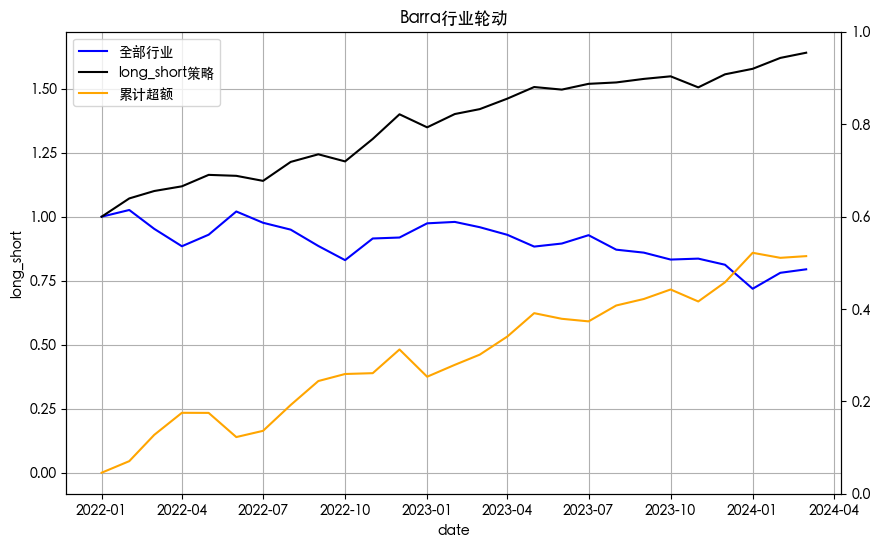

In [2]:
# 回测结果可以从这里看，更改文件夹名称即可切换
import barra残差动量 as barra
# folder names: NN, RF, XGBoost, LightGBM
score = pd.read_csv('data/ML/LightGBM/score.csv', index_col=0, parse_dates=True)

score = score.groupby(score.index.to_period('M')).last()

# # 储存月频收益率
# score.to_csv('data/ML/LightGBM/score_monthly.csv')
# # 储存22年后预测大于0的行业
# list_of_line = []
# for date in score.index:
#     line_to_print = []
#     line_to_print.append(str(date))
#     if date > pd.to_datetime('2021-12-31').to_period('M'):
#         temp_row = score.loc[date]
#         for i in temp_row.index:
#             if temp_row.loc[i] > 0:
#                 line_to_print.append(i)
#     print(line_to_print)
#     list_of_line.append(line_to_print)
# ind_other_zero = pd.DataFrame(list_of_line)

industries = pd.read_csv('data/申万31大行业_close.csv').columns[1:]
# Values to remove
values_to_remove = ['银行(申万)', '非银金融(申万)']
# Remove values using difference()
industries = industries.difference(values_to_remove)

close = pd.read_csv('data/申万31大行业_close.csv', index_col=0, parse_dates=True)
# close.index = pd.to_datetime(close.index, format='%Y-%m-%d')
close = close.groupby(close.index.to_period('M')).last()

output = barra.ranking_backtest(close, score)
barra.report(output)

# 滚动回测
## 滚动回测（连续等长训练集）

2016-06-30 ~ 2024-03-29

96 - 2 = 94 个月

94/4 = 23.5

21个月train and valid，10个月test


train: 2016-06-30 00:00:00 to 2018-02-28 00:00:00
test: 2018-03-30 00:00:00 to 2018-12-28 00:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4097
[LightGBM] [Info] Number of data points in the train set: 8241, number of used features: 45
[LightGBM] [Info] Start training from score 0.000358
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.0412397	valid_1's rmse: 0.0419052
Mean Squared Error: 0.0055465173746315904
策略年化收益： 0.10311451896249024
策略年化波动率： 0.05514452524164676
策略最大回撤： -0.02647255017910677
策略夏普： 1.869895851140906

基准年化收益： -0.346630006291077
基准年化波动率： 0.1684809438803939
基准最大回撤： -0.27327619057477937
基准夏普： -2.0573840477600402

超额统计：
超额>0: 7
超额<0: 2
胜率： 0.7777777777777778


<Figure size 1000x600 with 0 Axes>

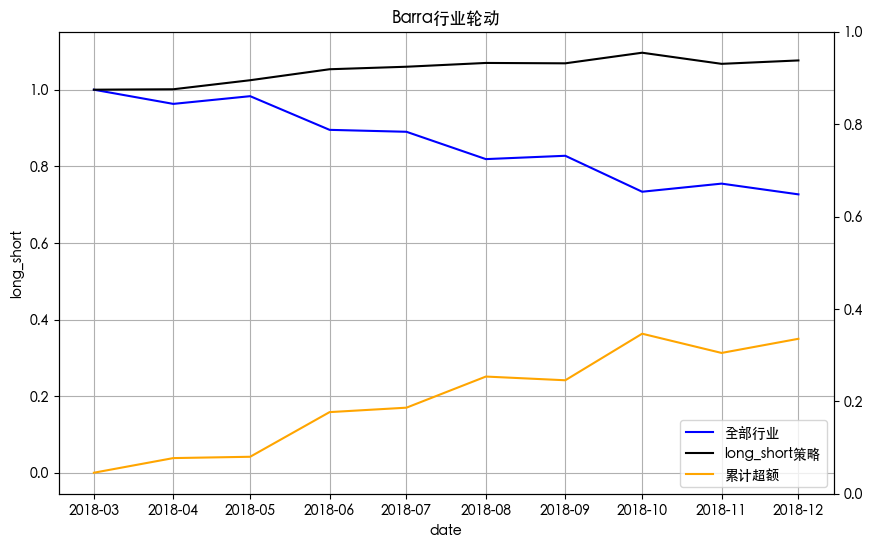


train: 2018-03-30 00:00:00 to 2019-11-29 00:00:00
test: 2019-12-31 00:00:00 to 2020-09-30 00:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4107
[LightGBM] [Info] Number of data points in the train set: 8262, number of used features: 45
[LightGBM] [Info] Start training from score -0.004514
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.0606143	valid_1's rmse: 0.064408
Mean Squared Error: 0.008499081360768974
策略年化收益： -0.1307533146227844
策略年化波动率： 0.126795526308696
策略最大回撤： -0.11826734724400423
策略夏普： -1.0312139428677694

基准年化收益： 0.3188267615538678
基准年化波动率： 0.21606940335954014
基准最大回撤： -0.06320327111914326
基准夏普： 1.4755757020504152

超额统计：
超额>0: 3
超额<0: 6
胜率： 0.3333333333333333


<Figure size 1000x600 with 0 Axes>

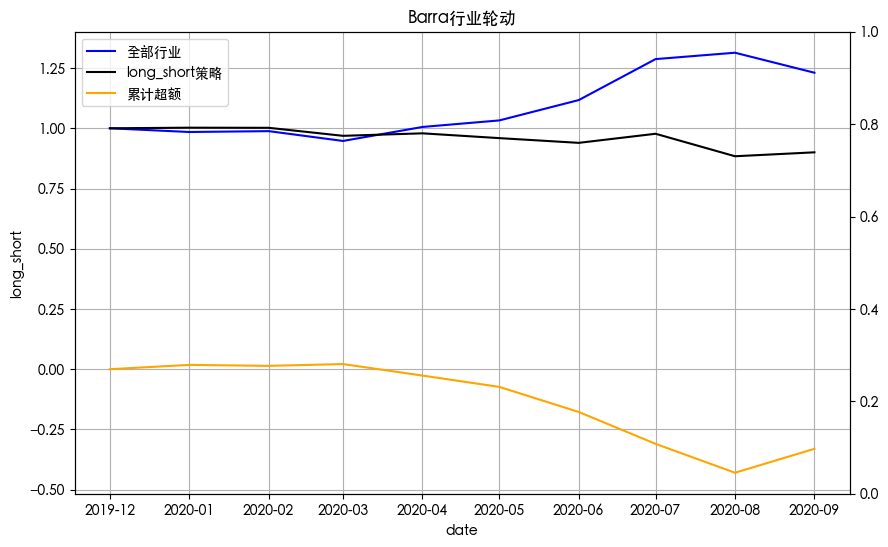


train: 2019-12-31 00:00:00 to 2021-08-31 00:00:00
test: 2021-09-30 00:00:00 to 2022-06-30 00:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4123
[LightGBM] [Info] Number of data points in the train set: 8241, number of used features: 45
[LightGBM] [Info] Start training from score 0.017936
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.0597198	valid_1's rmse: 0.0620145
Mean Squared Error: 0.006846680526559715
策略年化收益： 0.41293469176793174
策略年化波动率： 0.1051764554156842
策略最大回撤： -0.01525079357637471
策略夏普： 3.926113407567392

基准年化收益： -0.05182380838139733
基准年化波动率： 0.2073652605365454
基准最大回撤： -0.1971927875560936
基准夏普： -0.2499155752863632

超额统计：
超额>0: 7
超额<0: 2
胜率： 0.7777777777777778


<Figure size 1000x600 with 0 Axes>

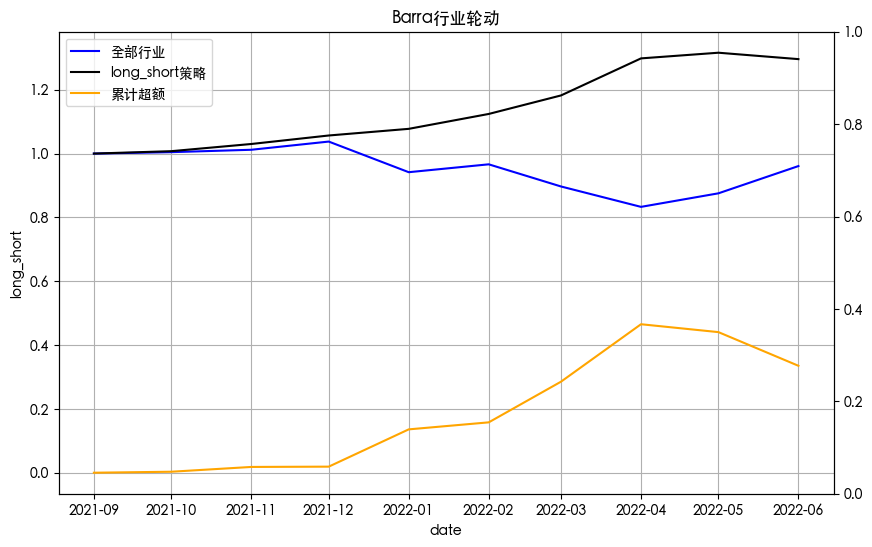


train: 2021-09-30 00:00:00 to 2023-05-31 00:00:00
test: 2023-06-30 00:00:00 to 2024-03-29 00:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4104
[LightGBM] [Info] Number of data points in the train set: 8160, number of used features: 45
[LightGBM] [Info] Start training from score -0.004870
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.0527728	valid_1's rmse: 0.0551442
Mean Squared Error: 0.004760463541034521
策略年化收益： 0.1346839160772717
策略年化波动率： 0.11077220155674354
策略最大回撤： -0.04163620312846761
策略夏普： 1.2158638555926804

基准年化收益： -0.14710621190865647
基准年化波动率： 0.18952301767239058
基准最大回撤： -0.22545194578167027
基准夏普： -0.7761917983120352

超额统计：
超额>0: 6
超额<0: 3
胜率： 0.6666666666666666


<Figure size 1000x600 with 0 Axes>

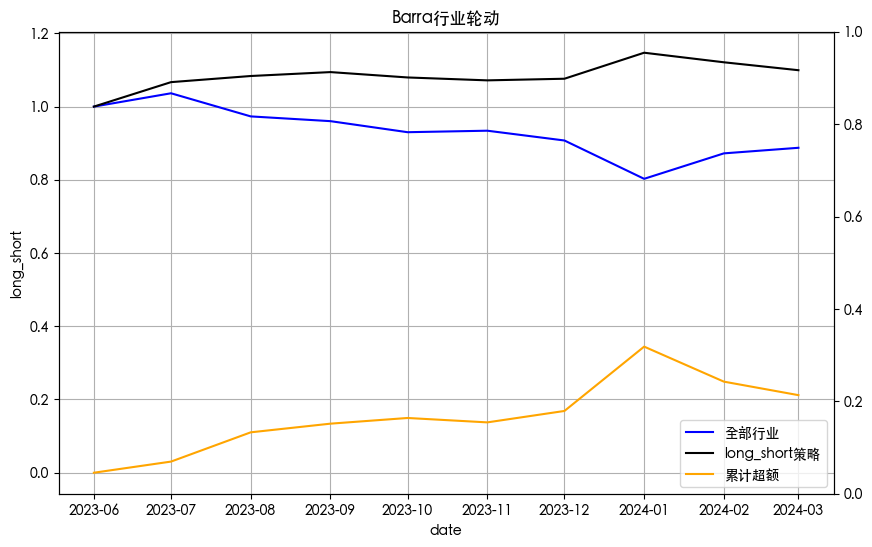

In [39]:
'''滚动回测（连续等长训练集）'''
import barra残差动量 as barra

original_data = pd.read_csv('data/ML/ML_merged_df.csv', index_col=0, parse_dates=True, date_format='%Y-%m-%d')
original_data['Date'] = pd.to_datetime(original_data['Date'])
data = pd.get_dummies(original_data, columns=['ind_name'], drop_first=False)

data.index = data['Date']
df = data.resample('ME').last()

train_datas = []
test_datas = []

# Define the period length in days
period_length = 21

# Create a list to hold the resulting DataFrames
df_list = []

# Loop through the DataFrame, slicing it into chunks of 60 days
for start in range(0, len(df), period_length):
    end = start + period_length
    test_end = end + 10
    if end > len(df):
        break

    df_slice = df.iloc[start:end]
    start_date = df_slice.iloc[0].loc['Date']
    end_date = df_slice.iloc[-1].loc['Date']
    # print(df_slice.index.unique)
    # print(start_date, end_date)
    data_slice = data[data.index >= start_date]
    data_slice = data_slice[data_slice.index <= end_date]
    # print(data_slice.index.unique())
    train_datas.append(data_slice)

    df_slice = df.iloc[end: test_end]
    start_date = df_slice.iloc[0].loc['Date']
    end_date = df_slice.iloc[-1].loc['Date']
    # print(df_slice.index.unique)
    # print(start_date, end_date)
    data_slice = data[data.index >= start_date]
    data_slice = data_slice[data_slice.index <= end_date]
    # print(data_slice.index.unique())
    test_datas.append(data_slice)

for i in range(4):
    # print(f"\nDataFrame {i+1} (approx. 2-month period):")
    temp_data = train_datas[i].drop(columns=['Date'])
    X = temp_data.drop(columns=['return_m'])
    y = temp_data['return_m']

    print('\ntrain:', (X.index.unique())[0], 'to', (X.index.unique())[-1])

    X_test = test_datas[i].drop(columns=['Date', 'return_m'])
    y_test = (test_datas[i])['return_m']

    print('test:', (X_test.index.unique())[0], 'to', (X_test.index.unique())[-1])

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_valid = lgb.Dataset(X_valid, label=y_valid, reference=lgb_train)
    params = {
    'objective': 'regression',       # Regression task
    'metric': 'rmse',                # Root mean squared error
    'num_leaves': 50,                # Number of leaves in one tree
    'learning_rate': 0.01,           # Learning rate
    'feature_fraction': 0.9,         # Subsample ratio of columns
    'bagging_fraction': 0.8,         # Subsample ratio of the training instances
    'bagging_freq': 5,               # Frequency for bagging
    'seed': 42                       # Random seed for reproducibility
    }
    num_round = 100
    bst = lgb.train(
        params,
        lgb_train,
        num_boost_round=num_round,
        valid_sets=[lgb_train, lgb_valid],
        callbacks=[lgb.early_stopping(stopping_rounds=10)]
    )
    # Make predictions
    y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # 回测
    test_data = test_datas[i].copy()
    test_data.index = test_data['Date']
    dates = test_data.resample('ME').last().loc[:, 'Date']

    # test_data_copy = test_data.copy()
    for i in test_data.index:
        # print(i)
        if i not in list(dates):
            if i in list(test_data.index):
                test_data.drop(i, axis=0, inplace=True)

    X_test = test_data.drop(columns=['Date', 'return_m'])

    # # XGBoost
    # dtest = xgb.DMatrix(X_test)
    # y_pred = model.predict(dtest)

    # # NN and RF
    # y_pred = model.predict(X_test)

    # light GBM
    y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)


    test_data['predict_r'] = y_pred.ravel()

    induesties = list(pd.read_csv('data/其他因子数据/处理后/index_growth.csv', index_col=0).columns)

    score = pd.DataFrame(None, index=test_data.index, columns=induesties)
    
    score = score.apply(pd.to_numeric)

    for date in score.index:
        temp = test_data.loc[date]
        for ind_name in induesties:
            # print(date, ind_name)
            # print(temp['ind_name_'+ind_name])
            # print(temp)
            score.loc[date, ind_name] = (temp[temp['ind_name_'+ind_name] == 1]).loc[date, 'predict_r']

    score = score.rename(columns=lambda x: f"{x}(申万)")

    score = score.groupby(score.index.to_period('M')).last()

    industries = pd.read_csv('data/申万31大行业_close.csv').columns[1:]
    # Values to remove
    values_to_remove = ['银行(申万)', '非银金融(申万)']
    # Remove values using difference()
    industries = industries.difference(values_to_remove)

    close = pd.read_csv('data/申万31大行业_close.csv', index_col=0, parse_dates=True)
    # close.index = pd.to_datetime(close.index, format='%Y-%m-%d')
    close = close.groupby(close.index.to_period('M')).last()

    output = barra.ranking_backtest(close, score)
    barra.report(output)


## 滚动回测（cumulative training sets）


train: 2016-06-30 00:00:00 to 2017-03-31 00:00:00
test: 2017-04-28 00:00:00 to 2018-01-31 00:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 3735, number of used features: 45
[LightGBM] [Info] Start training from score 0.005667
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.0287004	valid_1's rmse: 0.030437
Mean Squared Error: 0.0033824504425261624
策略年化收益： -0.014415497719076575
策略年化波动率： 0.08860584085332313
策略最大回撤： -0.08544611503073851
策略夏普： -0.16269240921645098

基准年化收益： 0.0585836203177057
基准年化波动率： 0.09727894723971556
基准最大回撤： -0.04645659867580487
基准夏普： 0.6022230089861424

超额统计：
超额>0: 4
超额<0: 5
胜率： 0.4444444444444444


<Figure size 1000x600 with 0 Axes>

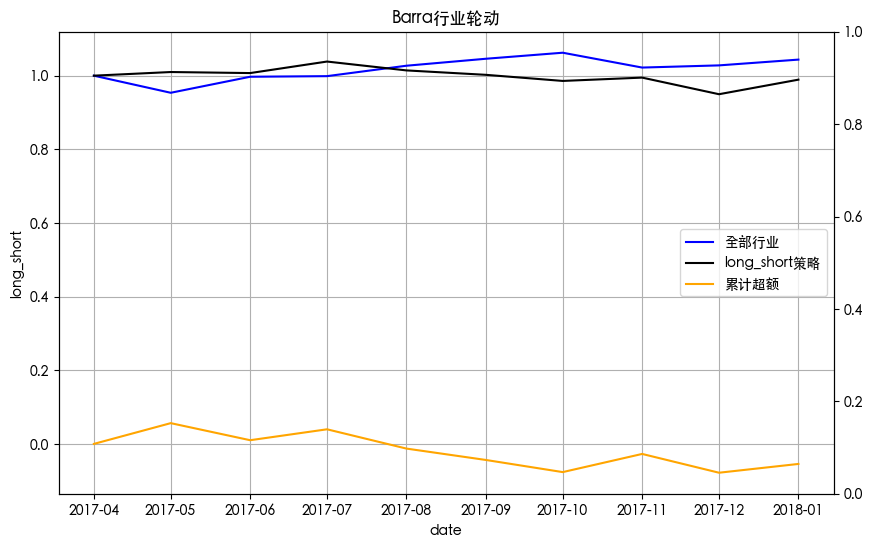


train: 2016-06-30 00:00:00 to 2018-01-31 00:00:00
test: 2018-02-28 00:00:00 to 2018-11-30 00:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4097
[LightGBM] [Info] Number of data points in the train set: 7937, number of used features: 45
[LightGBM] [Info] Start training from score -0.001409
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.0391794	valid_1's rmse: 0.0408996
Mean Squared Error: 0.005307315203120203
策略年化收益： 0.01911436513139031
策略年化波动率： 0.08254403848168022
策略最大回撤： -0.03804413641234716
策略夏普： 0.23156566461952963

基准年化收益： -0.3098334921902064
基准年化波动率： 0.17302518227723282
基准最大回撤： -0.2663930611402968
基准夏普： -1.790684385431075

超额统计：
超额>0: 5
超额<0: 4
胜率： 0.5555555555555556


<Figure size 1000x600 with 0 Axes>

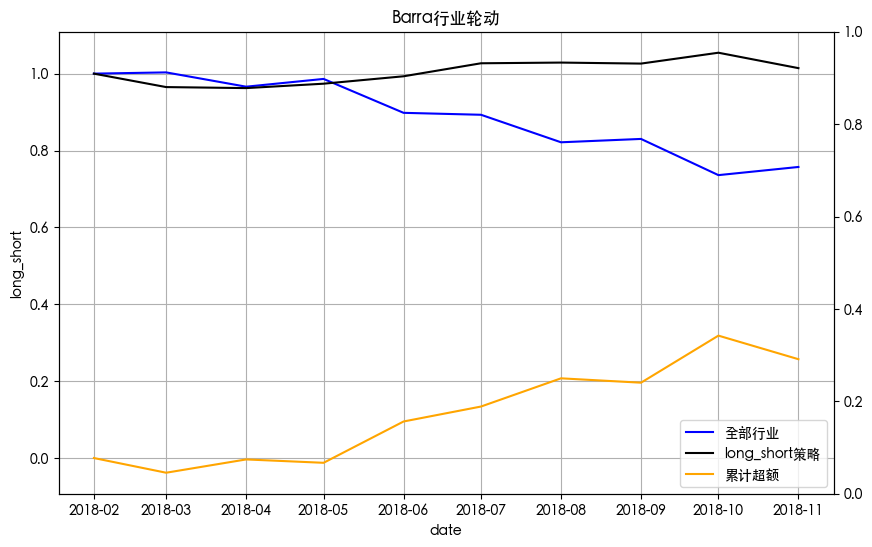


train: 2016-06-30 00:00:00 to 2018-11-30 00:00:00
test: 2018-12-28 00:00:00 to 2019-09-30 00:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4111
[LightGBM] [Info] Number of data points in the train set: 12017, number of used features: 45
[LightGBM] [Info] Start training from score -0.010994
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.0481382	valid_1's rmse: 0.0494819
Mean Squared Error: 0.010223729279585632
策略年化收益： 0.05556619664435036
策略年化波动率： 0.0985088362525384
策略最大回撤： -0.04097632454412292
策略夏普： 0.5640732218366707

基准年化收益： 0.33374493581700415
基准年化波动率： 0.22555474958487207
基准最大回撤： -0.0729631407994229
基准夏普： 1.479662638145521

超额统计：
超额>0: 4
超额<0: 5
胜率： 0.4444444444444444


<Figure size 1000x600 with 0 Axes>

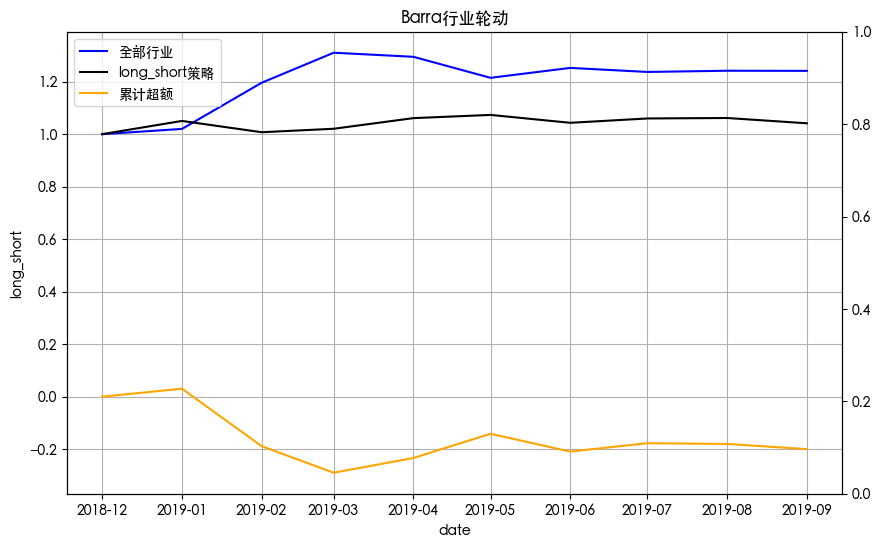


train: 2016-06-30 00:00:00 to 2019-09-30 00:00:00
test: 2019-10-31 00:00:00 to 2020-07-31 00:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4124
[LightGBM] [Info] Number of data points in the train set: 16138, number of used features: 45
[LightGBM] [Info] Start training from score -0.003278
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.0569153	valid_1's rmse: 0.058817
Mean Squared Error: 0.008767665959880981
策略年化收益： -0.18973241895009352
策略年化波动率： 0.16465249342655958
策略最大回撤： -0.16427759486329785
策略夏普： -1.1523203505856436

基准年化收益： 0.5021977417513082
基准年化波动率： 0.2010079186616973
基准最大回撤： -0.0525563169951242
基准夏普： 2.498397799922116

超额统计：
超额>0: 3
超额<0: 6
胜率： 0.3333333333333333


<Figure size 1000x600 with 0 Axes>

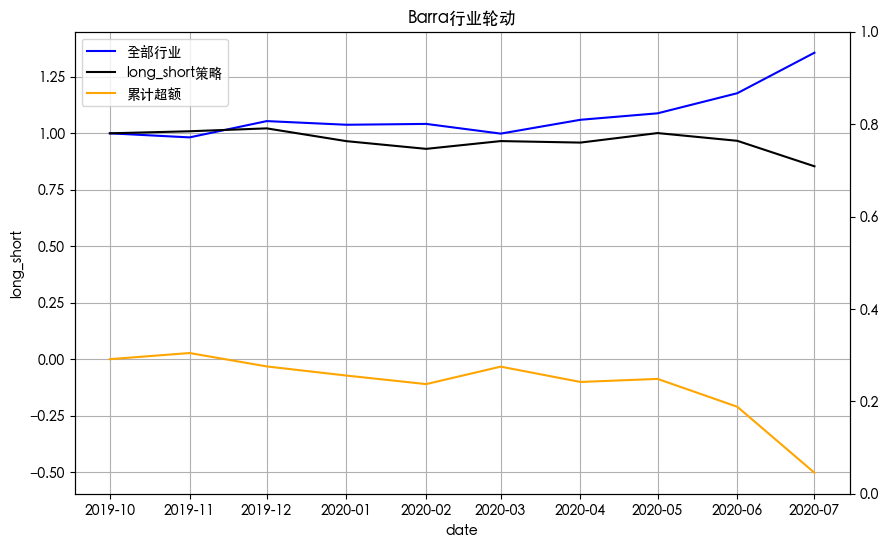


train: 2016-06-30 00:00:00 to 2020-07-31 00:00:00
test: 2020-08-31 00:00:00 to 2021-05-31 00:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4129
[LightGBM] [Info] Number of data points in the train set: 20218, number of used features: 45
[LightGBM] [Info] Start training from score 0.003607
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.0621123	valid_1's rmse: 0.0623835
Mean Squared Error: 0.004960008393996817
策略年化收益： 0.2843053848038868
策略年化波动率： 0.10400287735750109
策略最大回撤： -0.015396248292562698
策略夏普： 2.7336299920492686

基准年化收益： 0.15496494808396966
基准年化波动率： 0.1255972072620785
基准最大回撤： -0.06320327111914326
基准夏普： 1.2338247916660339

超额统计：
超额>0: 6
超额<0: 3
胜率： 0.6666666666666666


<Figure size 1000x600 with 0 Axes>

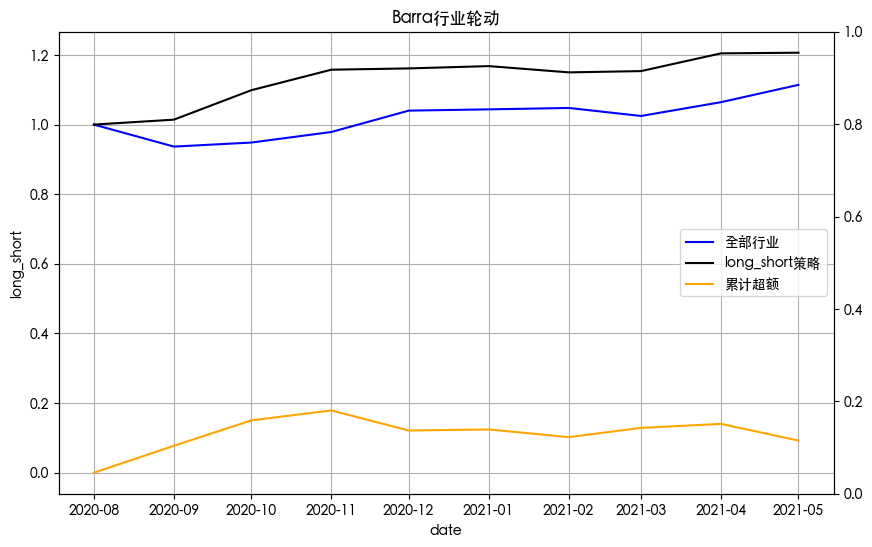


train: 2016-06-30 00:00:00 to 2021-05-31 00:00:00
test: 2021-06-30 00:00:00 to 2022-03-31 00:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4136
[LightGBM] [Info] Number of data points in the train set: 24278, number of used features: 45
[LightGBM] [Info] Start training from score 0.003992
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.062015	valid_1's rmse: 0.0642046
Mean Squared Error: 0.006639687262816502
策略年化收益： 0.5720625385177567
策略年化波动率： 0.24074329711768988
策略最大回撤： -0.07889267849443171
策略夏普： 2.3762345426302685

基准年化收益： -0.1902641192340403
基准年化波动率： 0.15915115678352318
基准最大回撤： -0.14639384485474638
基准夏普： -1.1954931593292586

超额统计：
超额>0: 7
超额<0: 2
胜率： 0.7777777777777778


<Figure size 1000x600 with 0 Axes>

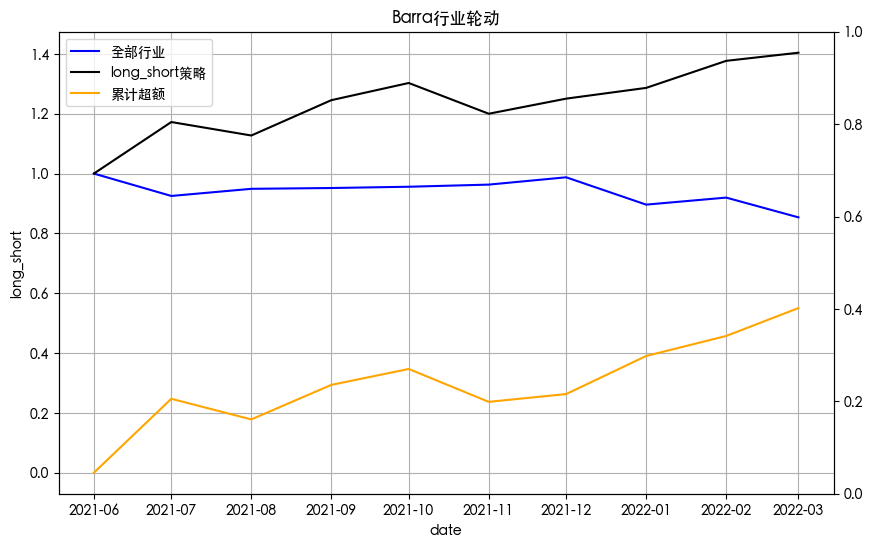


train: 2016-06-30 00:00:00 to 2022-03-31 00:00:00
test: 2022-04-29 00:00:00 to 2023-01-31 00:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4137
[LightGBM] [Info] Number of data points in the train set: 28420, number of used features: 45
[LightGBM] [Info] Start training from score 0.001905
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.0644658	valid_1's rmse: 0.0662436
Mean Squared Error: 0.004523409275293681
策略年化收益： 0.35070404359289276
策略年化波动率： 0.1166134512826243
策略最大回撤： -0.04665694835989653
策略夏普： 3.007406433267519

基准年化收益： 0.13708784408455443
基准年化波动率： 0.21825182677877086
基准最大回撤： -0.18624694055780244
基准夏普： 0.6281177395299072

超额统计：
超额>0: 4
超额<0: 5
胜率： 0.4444444444444444


<Figure size 1000x600 with 0 Axes>

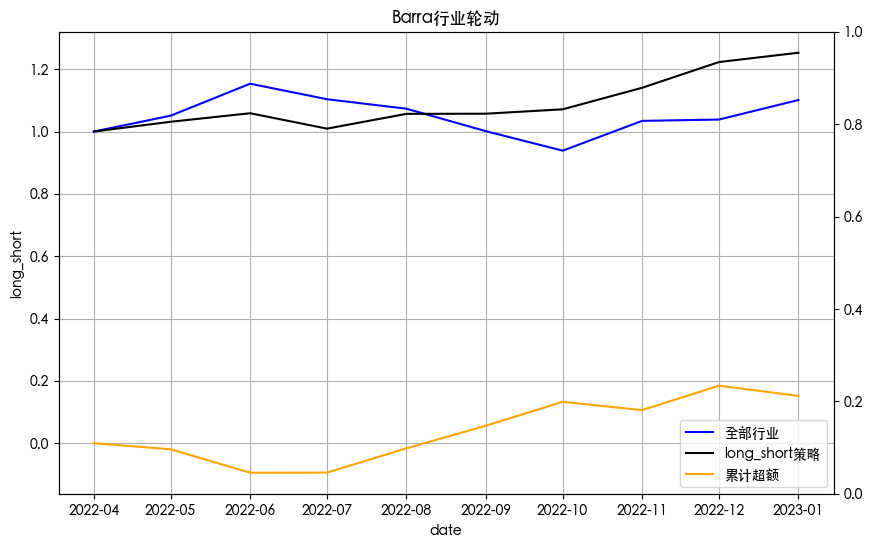


train: 2016-06-30 00:00:00 to 2023-01-31 00:00:00
test: 2023-02-28 00:00:00 to 2023-11-30 00:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4138
[LightGBM] [Info] Number of data points in the train set: 32480, number of used features: 45
[LightGBM] [Info] Start training from score 0.003148
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.0649587	valid_1's rmse: 0.0670181
Mean Squared Error: 0.0031162103996816267
策略年化收益： -0.08800576012380146
策略年化波动率： 0.11547241441727879
策略最大回撤： -0.08091041807840893
策略夏普： -0.7621366589407059

基准年化收益： -0.19020042327833664
基准年化波动率： 0.10103813390605663
基准最大回撤： -0.15008875156137003
基准夏普： -1.8824617589946924

超额统计：
超额>0: 6
超额<0: 3
胜率： 0.6666666666666666


<Figure size 1000x600 with 0 Axes>

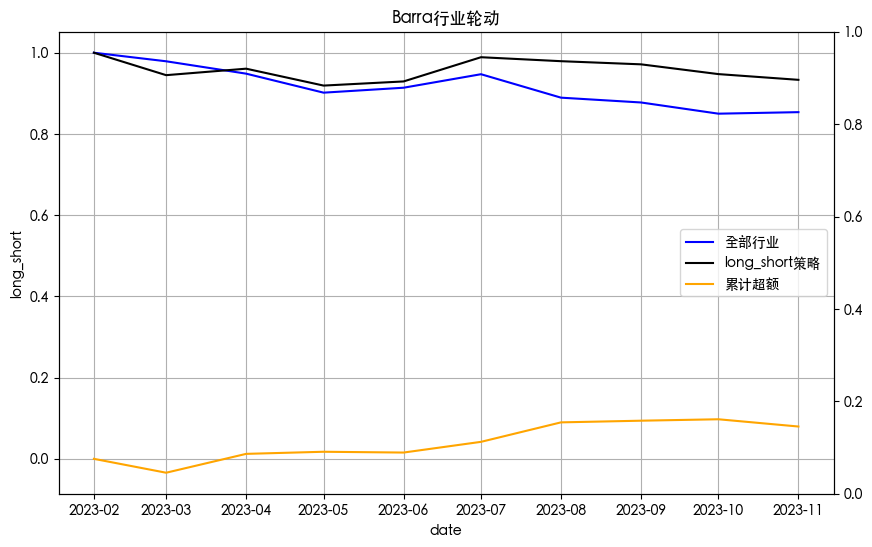


train: 2016-06-30 00:00:00 to 2023-11-30 00:00:00
test: 2023-12-29 00:00:00 to 2024-03-29 00:00:00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4138
[LightGBM] [Info] Number of data points in the train set: 36641, number of used features: 45
[LightGBM] [Info] Start training from score 0.000985
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.0641496	valid_1's rmse: 0.0651425
Mean Squared Error: 0.008669553473728461
策略年化收益： 0.22358878097424806
策略年化波动率： 0.07355035961512377
策略最大回撤： -0.004962415809298459
策略夏普： 3.039941370025235

基准年化收益： -0.08500962177363758
基准年化波动率： 0.29031398818271004
基准最大回撤： -0.11536505539215913
基准夏普： -0.2928195858069936

超额统计：
超额>0: 1
超额<0: 2
胜率： 0.3333333333333333


<Figure size 1000x600 with 0 Axes>

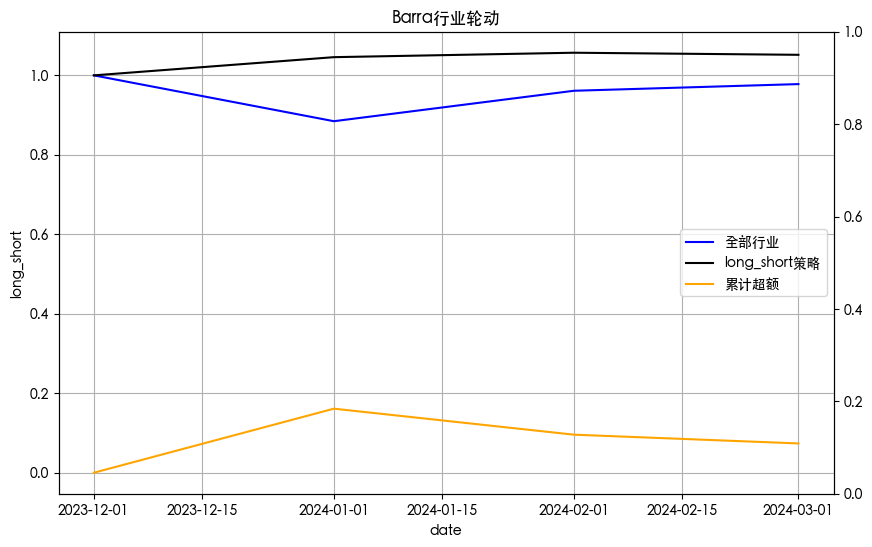

In [43]:
'''滚动回测（cumuative traing sets）'''
import barra残差动量 as barra

original_data = pd.read_csv('data/ML/ML_merged_df.csv', index_col=0, parse_dates=True, date_format='%Y-%m-%d')
original_data['Date'] = pd.to_datetime(original_data['Date'])
data = pd.get_dummies(original_data, columns=['ind_name'], drop_first=False)

data.index = data['Date']
df = data.resample('ME').last()

train_datas = []
test_datas = []

# Define the period length in days
period_length = 10

# Create a list to hold the resulting DataFrames
df_list = []

# Loop through the DataFrame, slicing it into chunks of 60 days
for start in range(0, len(df), period_length):
    end = start + period_length
    test_end = end + 10
    if end > len(df):
        break

    df_slice = df.iloc[start:end]
    start_date = data['Date'].iloc[0]
    end_date = df_slice.iloc[-1].loc['Date']
    # print(df_slice.index.unique)
    # print(start_date, end_date)
    data_slice = data[data.index >= start_date]
    data_slice = data_slice[data_slice.index <= end_date]
    # print(data_slice.index.unique())
    train_datas.append(data_slice)

    df_slice = df.iloc[end: test_end]
    start_date = df_slice.iloc[0].loc['Date']
    end_date = df_slice.iloc[-1].loc['Date']
    # print(df_slice.index.unique)
    # print(start_date, end_date)
    data_slice = data[data.index >= start_date]
    data_slice = data_slice[data_slice.index <= end_date]
    # print(data_slice.index.unique())
    test_datas.append(data_slice)

for i in range(len(test_datas)):
    # print(f"\nDataFrame {i+1} (approx. 2-month period):")
    temp_data = train_datas[i].drop(columns=['Date'])
    X = temp_data.drop(columns=['return_m'])
    y = temp_data['return_m']

    print('\ntrain:', (X.index.unique())[0], 'to', (X.index.unique())[-1])

    X_test = test_datas[i].drop(columns=['Date', 'return_m'])
    y_test = (test_datas[i])['return_m']

    print('test:', (X_test.index.unique())[0], 'to', (X_test.index.unique())[-1])

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_valid = lgb.Dataset(X_valid, label=y_valid, reference=lgb_train)
    params = {
    'objective': 'regression',       # Regression task
    'metric': 'rmse',                # Root mean squared error
    'num_leaves': 50,                # Number of leaves in one tree
    'learning_rate': 0.01,           # Learning rate
    'feature_fraction': 0.9,         # Subsample ratio of columns
    'bagging_fraction': 0.8,         # Subsample ratio of the training instances
    'bagging_freq': 5,               # Frequency for bagging
    'seed': 42                       # Random seed for reproducibility
    }
    num_round = 100
    bst = lgb.train(
        params,
        lgb_train,
        num_boost_round=num_round,
        valid_sets=[lgb_train, lgb_valid],
        callbacks=[lgb.early_stopping(stopping_rounds=10)]
    )
    # Make predictions
    y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # 回测
    test_data = test_datas[i].copy()
    test_data.index = test_data['Date']
    dates = test_data.resample('ME').last().loc[:, 'Date']

    # test_data_copy = test_data.copy()
    for i in test_data.index:
        # print(i)
        if i not in list(dates):
            if i in list(test_data.index):
                test_data.drop(i, axis=0, inplace=True)

    X_test = test_data.drop(columns=['Date', 'return_m'])

    # # XGBoost
    # dtest = xgb.DMatrix(X_test)
    # y_pred = model.predict(dtest)

    # # NN and RF
    # y_pred = model.predict(X_test)

    # light GBM
    y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)


    test_data['predict_r'] = y_pred.ravel()

    induesties = list(pd.read_csv('data/其他因子数据/处理后/index_growth.csv', index_col=0).columns)

    score = pd.DataFrame(None, index=test_data.index, columns=induesties)
    
    score = score.apply(pd.to_numeric)

    for date in score.index:
        temp = test_data.loc[date]
        for ind_name in induesties:
            # print(date, ind_name)
            # print(temp['ind_name_'+ind_name])
            # print(temp)
            score.loc[date, ind_name] = (temp[temp['ind_name_'+ind_name] == 1]).loc[date, 'predict_r']

    score = score.rename(columns=lambda x: f"{x}(申万)")

    score = score.groupby(score.index.to_period('M')).last()

    industries = pd.read_csv('data/申万31大行业_close.csv').columns[1:]
    # Values to remove
    values_to_remove = ['银行(申万)', '非银金融(申万)']
    # Remove values using difference()
    industries = industries.difference(values_to_remove)

    close = pd.read_csv('data/申万31大行业_close.csv', index_col=0, parse_dates=True)
    # close.index = pd.to_datetime(close.index, format='%Y-%m-%d')
    close = close.groupby(close.index.to_period('M')).last()

    output = barra.ranking_backtest(close, score)
    barra.report(output)
